# MACHINE LEARNING PROJECT USING LINEAR REGRESSION ON STEAM TABLES


# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data 

In [3]:
data=pd.read_csv("steam_tables(modified1) (1).csv")

## Original CSV data

In [3]:
data

,Temp,Sat_press,Spec_vol_Sat_liquid,Internal_energy_Sat_liquid,Internal_energy_Evap,Internal_energy_Sat_vapour,Enthalpy_Sat_liquid,Enthalpy_Evap,Enthalpy_Sat_vapour,Entropy_Sat_liquid,Entropy_Evap,Entropy_Sat_vapour
0,0.01,0.6117,0.001000,0.000,2374.9,2374.9,0.001,2500.9,2500.9,0.0000,9.1556,9.1556
1,5.00,0.8728,0.001000,21.019,2360.8,2381.8,21.020,2489.1,2510.1,0.0763,8.9487,9.0249
2,10.00,1.2281,0.001000,42.020,2346.6,2388.7,42.022,2477.2,2519.2,0.1511,8.7488,8.8999
3,15.00,1.7057,0.001001,62.980,2332.5,2395.5,62.982,2465.4,2528.3,0.2245,8.5559,2.7803
4,20.00,2.3392,0.001002,83.913,2318.4,2402.3,83.915,2453.5,2537.4,0.2965,8.3696,8.6661
...,...,...,...,...,...,...,...,...,...,...,...,...
144,361.47,19000.0000,0.001926,1740.300,598.9,2339.2,1776.800,689.2,2466.0,3.9396,1.0860,5.0256
145,365.75,20000.0000,0.002038,1785.800,509.0,2294.8,1826.600,585.5,2412.1,4.0146,0.9164,4.9310
146,369.83,21000.0000,0.002207,1841.600,391.9,2233.5,1888.000,450.4,2338.4,4.1071,0.7005,4.8076
147,373.71,22000.0000,0.002703,1951.700,140.8,2092.4,2011.100,161.5,2172.6,4.2942,0.2496,4.5439


## Splitting the data for testing and training

In [4]:
split=np.random.rand(len(data))<0.8
train=data[split]
test=data[~split]
print("Training Data Shape",len(train))
print("Testing Data Shape",len(test))

Training Data Shape 127
Testing Data Shape 22


## Finding the Specific Volume of Saturated Liquid Using Linear Regression

Reg_coeff [[-8.06279589e-08  5.28717851e-08]]
Reg_intercept [0.00104192]


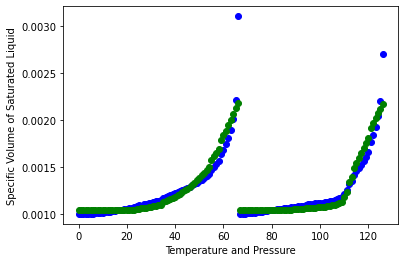

MSE: 1.6905330052941198e-08
R2 Score: 0.8689456154900355
[[0.00196483]]


In [5]:
#Importing LinearRegression from Scikitlearn
from sklearn import linear_model
reg1=linear_model.LinearRegression()
#Taking the required data from the whole
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Spec_vol_Sat_liquid']])
reg1.fit(inp1,out1)
print("Reg_coeff",reg1.coef_)
print("Reg_intercept",reg1.intercept_)
#visualization of the original and predicted data
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg1.coef_[0][0]*train.Temp + reg1.coef_[0][1]*train.Sat_press+reg1.intercept_[0], color = "green")
plt.xlabel ("Temperature and Pressure")
plt.ylabel ("Specific Volume of Saturated Liquid")
plt.show()
inp1test = np.asanyarray(data[['Temp','Sat_press']])
out1test = np.asanyarray(data[['Spec_vol_Sat_liquid']])
out1pred = reg1.predict(inp1test)
#Finding the R2 score and Mean squared error for original and predicted outputs
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out1test,out1pred))
print ("R2 Score:",r2_score(out1test,out1pred))
print(reg1.predict(np.array([[356.99,18000]])))

## Finding the Internal Energy of Saturated Liquid 

Reg_coeff [[3.98720875 0.0157655 ]]
Reg_intercept [14.91040954]


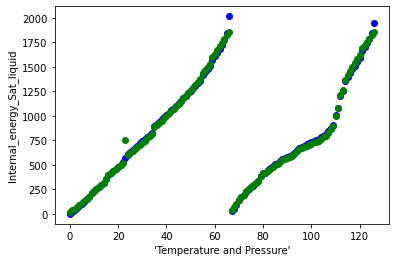

MSE: 836.6057357019151
R2 Score: 0.9968990959027485
[[539.34276124]]


In [6]:
from sklearn import linear_model
reg2=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Internal_energy_Sat_liquid']])
reg2.fit(inp1,out1)
print("Reg_coeff",reg2.coef_)
print("Reg_intercept",reg2.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg2.coef_[0][0]*train.Temp + reg2.coef_[0][1]*train.Sat_press+reg2.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Internal_energy_Sat_liquid")
plt.show()
inp2test = np.asanyarray(data[['Temp','Sat_press']])
out2test = np.asanyarray(data[['Internal_energy_Sat_liquid']])
out2pred = reg2.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out2test,out2pred))
print ("R2 Score:",r2_score(out2test,out2pred))
print(reg2.predict(np.array([[130.46,270.28]])))

## Finding the Internal Energy of Evaporation

Reg_coeff [[-2.51863147 -0.04600318]]
Reg_intercept [2347.0755951]


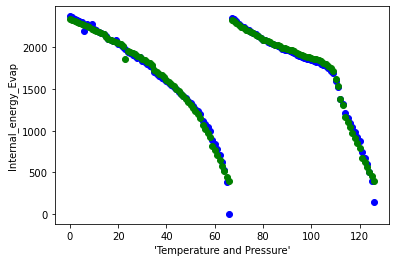

MSE: 1857477.0573958978
R2 Score: -5.884794081643675
[[1639.11487425]]


In [7]:
from sklearn import linear_model
reg4=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Internal_energy_Evap']])
reg4.fit(inp1,out1)
print("Reg_coeff",reg4.coef_)
print("Reg_intercept",reg4.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg4.coef_[0][0]*train.Temp + reg4.coef_[0][1]*train.Sat_press+reg4.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Internal_energy_Evap")
plt.show()
inp3test = np.asanyarray(data[['Temp','Sat_press']])
out3test = np.asanyarray(data[['Internal_energy_Sat_liquid']])
out3pred = reg4.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out3test,out3pred))
print ("R2 Score:",r2_score(out3test,out3pred))
print(reg4.predict(np.array([[230,2797.1]])))

## Finding the Internal energy of saturated vapour 

Reg_coeff [[ 1.51428577 -0.03179973]]
Reg_intercept [2363.41719241]


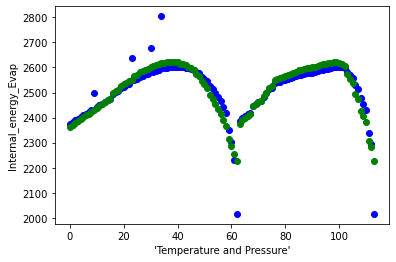

MSE: 1574.6919852291587
R2 Score: 0.8666378241422701
[[2622.75589853]]


In [8]:
from sklearn import linear_model
reg5=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Internal_energy_Sat_vapour']])
reg5.fit(inp1,out1)
print("Reg_coeff",reg5.coef_)
print("Reg_intercept",reg5.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg5.coef_[0][0]*train.Temp + reg5.coef_[0][1]*train.Sat_press+reg5.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Internal_energy_Evap")
plt.show()
inp1test = np.asanyarray(data[['Temp','Sat_press']])
out1test = np.asanyarray(data[['Internal_energy_Sat_vapour']])
out1pred = reg5.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out1test,out1pred))
print ("R2 Score:",r2_score(out1test,out1pred))
print(reg5.predict(np.array([[230,2797.1]])))

# Finding the Enthalpy of Saturated Liquid 

Reg_coeff [[3.9772424 0.0181134]]
Reg_intercept [17.45962801]


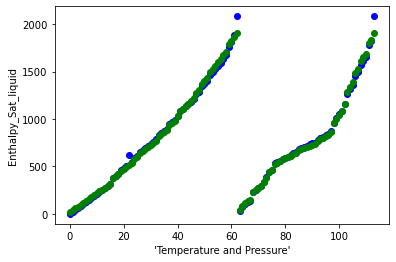

MSE: 1119.5222642863355
R2 Score: 0.996015527737432
[[982.89038442]]


In [9]:
from sklearn import linear_model
reg6=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Enthalpy_Sat_liquid']])
reg6.fit(inp1,out1)
print("Reg_coeff",reg6.coef_)
print("Reg_intercept",reg6.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg6.coef_[0][0]*train.Temp + reg6.coef_[0][1]*train.Sat_press+reg6.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Enthalpy_Sat_liquid")
plt.show()
inp1test = np.asanyarray(data[['Temp','Sat_press']])
out1test = np.asanyarray(data[['Enthalpy_Sat_liquid']])
out1pred = reg6.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out1test,out1pred))
print ("R2 Score:",r2_score(out1test,out1pred))
print(reg6.predict(np.array([[230,2797.1]])))

## Finding the Enthalpy of Evaporation

Reg_coeff [[-2.05643861 -0.05774347]]
Reg_intercept [2471.32694912]


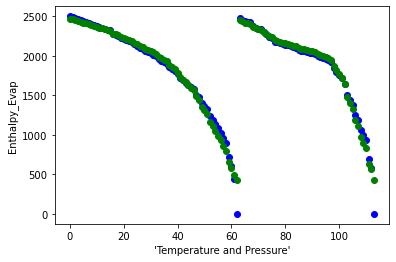

MSE: 172507.3361910005
R2 Score: 0.6666623515419732
[[1558.13219099]]


In [10]:
from sklearn import linear_model
reg7=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Enthalpy_Evap']])
reg7.fit(inp1,out1)
print("Reg_coeff",reg7.coef_)
print("Reg_intercept",reg7.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg7.coef_[0][0]*train.Temp + reg7.coef_[0][1]*train.Sat_press+reg7.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Enthalpy_Evap")
plt.show()
inp1test = np.asanyarray(data[['Temp','Sat_press']])
out1test = np.asanyarray(data[['Enthalpy_Evap']])
out1pred = reg7.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out1test,out1pred))
print ("R2 Score:",r2_score(out1test,out1pred))
print(reg7.predict(np.array([[275.59,6000]])))

# # Finding the Enthalpy of Saturated Vapour

Reg_coeff [[ 1.92016868 -0.03952803]]
Reg_intercept [2487.59257076]


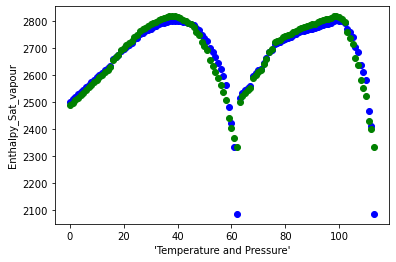

MSE: 1578.6264991914147
R2 Score: 0.9100037753420239
[[2779.603681]]


In [11]:
from sklearn import linear_model
reg8=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Enthalpy_Sat_vapour']])
reg8.fit(inp1,out1)
print("Reg_coeff",reg8.coef_)
print("Reg_intercept",reg8.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg8.coef_[0][0]*train.Temp + reg8.coef_[0][1]*train.Sat_press+reg8.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Enthalpy_Sat_vapour")
plt.show()
inp1test = np.asanyarray(data[['Temp','Sat_press']])
out1test = np.asanyarray(data[['Enthalpy_Sat_vapour']])
out1pred = reg8.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out1test,out1pred))
print ("R2 Score:",r2_score(out1test,out1pred))
print(reg8.predict(np.array([[275.59,6000]])))

## Finding th Entropy of Saturated Liquid

Reg_coeff [[ 1.07934579e-02 -7.06587022e-06]]
Reg_intercept [0.16670439]


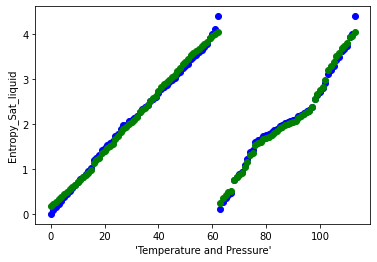

MSE: 0.0074782905237130316
R2 Score: 0.9941332509164001
[[3.09887823]]


In [12]:
from sklearn import linear_model
reg9=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Entropy_Sat_liquid']])
reg9.fit(inp1,out1)
print("Reg_coeff",reg9.coef_)
print("Reg_intercept",reg9.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg9.coef_[0][0]*train.Temp + reg9.coef_[0][1]*train.Sat_press+reg9.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Entropy_Sat_liquid")
plt.show()
inp1test = np.asanyarray(data[['Temp','Sat_press']])
out1test = np.asanyarray(data[['Entropy_Sat_liquid']])
out1pred = reg9.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out1test,out1pred))
print ("R2 Score:",r2_score(out1test,out1pred))
print(reg9.predict(np.array([[275.59,6000]])))

## Finding the Entropy of Evaporation

Reg_coeff [[-2.20824718e-02  3.36088310e-05]]
Reg_intercept [8.49758353]


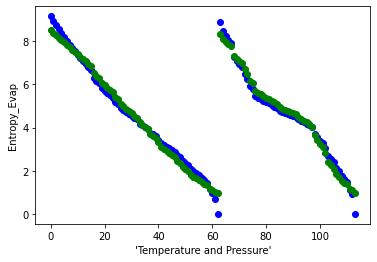

MSE: 0.06793727060235906
R2 Score: 0.9861556175247979
[[2.6135281]]


In [13]:
from sklearn import linear_model
reg10=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Entropy_Evap']])
reg10.fit(inp1,out1)
print("Reg_coeff",reg10.coef_)
print("Reg_intercept",reg10.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg10.coef_[0][0]*train.Temp + reg10.coef_[0][1]*train.Sat_press+reg10.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Entropy_Evap")
plt.show()
inp1test = np.asanyarray(data[['Temp','Sat_press']])
out1test = np.asanyarray(data[['Entropy_Evap']])
out1pred = reg10.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out1test,out1pred))
print ("R2 Score:",r2_score(out1test,out1pred))
print(reg10.predict(np.array([[275.59,6000]])))

## Finding the Entropy of Saturated Vapour

Reg_coeff [[-7.95490498e-03 -1.21979264e-05]]
Reg_intercept [8.1071508]


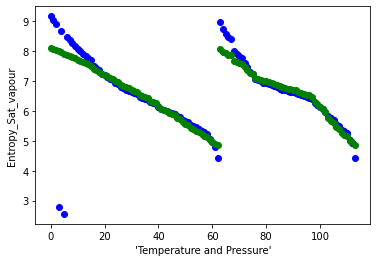

MSE: 0.44370698418771165
R2 Score: 0.6698816409655739
[[5.84167098]]


In [14]:
from sklearn import linear_model
reg11=linear_model.LinearRegression()
inp1=np.asanyarray(train[['Temp','Sat_press']])
out1=np.asanyarray(train[['Entropy_Sat_vapour ']])
reg11.fit(inp1,out1)
print("Reg_coeff",reg11.coef_)
print("Reg_intercept",reg11.intercept_)
x = np.arange(0,len(train),1)
plt.scatter(x,out1,color = "blue")
plt.scatter(x,reg11.coef_[0][0]*train.Temp + reg11.coef_[0][1]*train.Sat_press+reg11.intercept_[0], color = "green")
plt.xlabel ("'Temperature and Pressure'")
plt.ylabel ("Entropy_Sat_vapour ")
plt.show()
inp1test = np.asanyarray(data[['Temp','Sat_press']])
out1test = np.asanyarray(data[['Entropy_Sat_vapour ']])
out1pred = reg11.predict(inp1test)
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE:",mean_squared_error (out1test,out1pred))
print ("R2 Score:",r2_score(out1test,out1pred))
print(reg11.predict(np.array([[275.59,6000]])))